# Food in America 
### By: Archana Ajith, Brian Davis, Ryan Lee


Through this project, our main aim was to analyze Yelp data of USA to understand the food trends across the country. In order to do this, we first collected all the data we needed about restaurants, including restaurant information and reviews. We then used this data to identify the most popular cuisines by country and created heat maps for each type of food. The next thing we tried was to create word clouds for each state, based on the reviews of the restaurants in that state. Based on the results from this, we decided to try something interesting. We wanted to see if we could identify whether a state was in the coastal region or not, based on the reviews.

# Data Collection

In order to gather information about the restaurants across the country, we decided to use the Yelp API. But to access the Yelp API, we first needed to go through a couple of steps to get an API key. We accomplished this by doing the following:

1. Create a Yelp account (if you do not have one already)
2. [Generate API keys](https://www.yelp.com/developers/v3/manage_app) (if you haven't already). You will only need the API Key (not the Client ID or Client Secret) -- more on that later.

We then stored this API key in a text file which was read in by the following function

In [1]:
def read_api_key(filepath):
    """
    Read the Yelp API Key from file.
    
    Args:
        filepath (string): File containing API Key
    Returns:
        api_key (string): The API Key
    """
    
    # feel free to modify this function if you are storing the API Key differently
    with open('api_key.txt', 'r') as f:
        return f.read().replace('\n','')

In [2]:
api_key = read_api_key('api_key.txt')

Using this API key, we queried into the Yelp API by state, to get the restaurant information of that state. We did this by passing in a list of the 3 most populated cities of that state. We got information for each city and then populated it all into a single JSON. We needed to use an offset and gradually get the info as the Yelp API would lock us out if we tried to get all the info at once

In [3]:
import io, time, json
import requests

def yelp_search(api_key, cities):
    """
    Make an authenticated request to the Yelp API.

    Args:
        api_key (string): API key to be used with the API.
        cities (list): list of the 3 most populated cities of the state.

    Returns:
        result (dictionary): Dictionary containing all the business information, along with the total number of 
                            business information collected.
    """
    
    # Write solution here
    headers = {
    "authorization": 'Bearer %s' % api_key, # for the yelp API 
    }
    results = dict()
    results['actual total'] = 0
    results['total'] = 0
    results['businesses'] = []
    for city in cities:
        params = {
            "location": city, 
            "categories": "restaurants",
            "limit": 50,
        }
        response = requests.get('https://api.yelp.com/v3/businesses/search',
                            headers=headers, params=params)
        new_results = response.json() #converts json into a python dictionary
        city_results = dict()
        total = new_results['total']
        city_results['actual total'] = new_results['total']
        city_results['total']= min(1000,new_results['total'] )
        city_results['businesses'] = new_results['businesses']
        for offset in range(50, city_results['total'], 50):
            time.sleep(0.2)
            params = {
                "location": city, 
                "offset": offset,
                "categories": "restaurants",
                "limit": 50,
            }
            response = requests.get('https://api.yelp.com/v3/businesses/search',
                            headers=headers, params=params)
            new_results = response.json()
            city_results['businesses'] = list(itertools.chain(city_results['businesses'], new_results['businesses']))
        results['total'] += city_results['total']
        results['actual total'] += city_results['actual total']
        results['businesses'].extend(city_results['businesses'])
    return results

The following function gets the info for each state and writes to files. It uses the dictionary of all states and the 3 most populated cities in each based on : https://www.cdc.gov/500cities/pdf/500-cities-listed-by-state.pdf

In [4]:
def get_data_for_state(key, state, cities):
    """
    Get the yelp data for a state, and write it to a file

    Args:
        state (string): Name of the state
        cities (list): List of the top 3 populated cities in the state

    """
    with open('data/'+state+'.txt', 'w') as f:
        data = yelp_search(key, cities)
        json.dump(data, f, ensure_ascii=False)

In [5]:
state_cities = {
          'alabama':['Birmingham, AL', 'Montgomery, AL', 'Mobile, AL'],
          'alaska':['Anchorage, AK'],
          'arizona':['Phoenix, AZ', 'Tucson, AZ', 'Mesa, AZ'],
          'arkansas':['Little Rock, AS', 'Fort Smith, AS', 'Fayetteville, AS'],
          'california':['Los Angeles, CA', 'San Diego, CA', 'San Jose, CA', 'San Francisco, CA'],
          'colorado':['Denver, CO', 'Colorado Springs, CO', 'Aurora, CO'],
          'connecticut':['Bridgeport, CT', 'New Haven, CT', 'Hartford, CT'],
          'delaware':['Wilmington, DE'],
          'dc':['Washington, DC'],
          'florida':['Jacksonville, FL', 'Miami, FL', 'Tampa, FL'],
          'georgia':['Atlanta, GA','Augusta-Richmond County, GA','Columbus, GA'],
          'hawaii':['Honolulu, HI'],
          'idaho':['Boise City, ID', 'Nampa, ID', 'Meridian, ID'],
          'illinois':['Chicago, IL','Aurora, IL', 'Rockford, IL'],
          'indiana':['Indianapolis, IN', 'Fort Wayne, IN', 'Evansville, IN'],
          'iowa':['Des Moines, IA', 'Cedar Rapids, IA', 'Davenport, IA'],
          'kansas':['Wichita, KS', 'Overland Park, KS', 'Kansas City, KS'],
          'louisiana':['New Orleans, LA', 'Baton Rouge, LA', 'Shreveport, LA'],
          'maine':['Portland, ME'],
          'maryland':['Baltimore, MD'],
          'massachusetts':['Boston, MA','Worcester, MA', 'Springfield, MA'],
          'michigan':['Detroit, MI', 'Grand Rapids, MI', 'Warren, MI'],
          'minnesota':['Minneapolis, MN', 'St. Paul, MN', 'Rochester, MN'],
          'mississippi':['Jackson, MS', 'Gulfport, MS'],
          'missouri':['Kansas City, MO', 'St. Louis, MO', 'Springfield, MO'],
          'montana':['Billings, MT', 'Missoula, MT'],
          'nebraska':['Omaha, NE', 'Lincoln, NE'],
          'nevada':['Las Vegas, NV', 'Henderson, NV', 'Reno, NV'],
          'newHampshire':['Manchester, NH', 'Nashua, NH'],
          'newJersey':['Newark, NJ', 'Jersey City, NJ', 'Paterson, NJ'],
          'newMexico':['Albuquerque, NM', 'Las Cruces, NM', 'Rio Rancho, NM'],
          'newYork':['New York, NY', 'Buffalo, NY', 'Rochester, NY'],
          'northCarolina':['Charlotte, NC', 'Raleigh, NC', 'Greensboro, NC'],
          'northDakota':['Fargo, ND'],
          'ohio':['Columbus, OH', 'Cleveland, OH', 'Cincinnati, OH'],
          'oklahoma':['Oklahoma City, OK', 'Tulsa, OK', 'Norman, OK'],
          'oregon':['Portland, OR', 'Eugene, OR', 'Salem, OR'],
          'pennsylvania':['Philadelphia, PA', 'Pittsburgh, PA', 'Allentown, PA'],
          'rhodeIsland':['Providence, RI', 'Warwick, RI', 'Cranston, RI'],
          'southCarolina':['Columbia, SC', 'Charleston, SC', 'North Charleston, SC'],
          'southDakota':['Sioux Falls, SD', 'Rapid City, SD'],
          'tennessee':['Memphis, TN', 'Nashville-Davidson, TN', 'Knoxville, TN'],
          'texas':['Houston, TX', 'San Antonio, TX', 'Dallas, TX'],
          'utah':['Salt Lake City, UT', 'West Valley City, UT', 'Provo, UT'],
          'vermont':['Burlington, VT'],
          'virginia':['Virginia Beach, VA', 'Norfolk, VA', 'Chesapeake, VA'],
          'washington':['Seattle, WA', 'Spokane, WA', 'Tacoma, WA'],
          'westVirginia':['Charleston, WV'],
          'wisconsin':['Milwaukee, WI', 'Madison, WI', 'Green Bay, WI'],
          'wyoming':['Cheyenne, WY'],
         }

In [6]:
for state in state_cities:
    get_data_for_state(api_key, state, states[state])

# Visualizing Yelp Categorical Data Accross The Country

In this part we visualized the yelp data in order to get a better picture of the differences between culinary preferences accross the US.

On top of that, we applied voting techniques on the data accross the entire country, as well as accross certain regions, to get an aggregated view of the data.

## Cleaning the data
The first step is to read the data from the files that we had previously written to, clean up the data and write the data into a pandas data frame for us to use later.

In [7]:
import pandas as pd
import os

price_converter = {
        "$"    : 1,
        "$$"   : 2,
        "$$$"  : 3,
        "$$$$" : 4,
        '€'    : 1,
        '€€'   : 2,
        '€€€'  : 3,
        '€€€€' : 4
    }


def state_to_frame(state_path):
    """ reads state data into dataframe, cleans, and concatenates them together for all cities
    Inputs
        state_path(str): path to the datafile for a given state
    Outputs
        state_frame(pd.DataFrame): cleaned dataframe of data from given file
    """
    state = pd.read_json(state_path)
    business_list = [pd.DataFrame(state["businesses"][i]) for i in range(len(state["businesses"]))]
    state_frame = pd.concat(business_list, ignore_index=True)
    state_frame.drop(['alias', 'display_phone', 'id',
       'image_url', 'is_closed', 'transactions'], axis=1, inplace=True)
    state_frame.dropna(inplace=True)
    state_frame.reset_index(drop=True, inplace=True)
    state_frame["categories"] = state_frame["categories"].apply(lambda x : [x[i]["title"] for i in range(len(x))])
    state_frame["price"] = state_frame["price"].apply(lambda x: price_converter[x])
    return state_frame


def read_statefiles(pathname="./mapdata/"):
    """ converts all state data files into a dataframe
    Inputs
        pathname(str): path of folder where state files are loacted
    Outputs
        state_dict(dict): dict with each input corresponding to dataframe for that state
    """
    state_dict = {}
    for filename in os.listdir(pathname):
        state_dict[filename[:-4]] = state_to_frame("./mapdata/" + filename)
    return state_dict

In [8]:
states = read_statefiles()

After making and cleaning dataframes from the collected data, we decided to find the top ranking foods for each country.

The metric we decided made the most sense for this was to see what foods had the most representation within each state. We assumed that if there were a large number of restaurants serving a certain type of food, that there was a high demand for it in the area. 

cat_dict contains the frequecy counts of restaurant categories per state

sorted_cat_dict contains a list of categories for each state sorted in descending order

top_5_all is a 2d array containing the top 5 categories for each state

top_choices contains the top 11 categories per state in descending order (a number chosen by inspection where many states had frequency fall off after)

In [9]:
import numpy as np
import collections
import itertools
import operator


cat_dict = {}
sorted_cat_dict = {}
top_5_all = []
top_choices = {}
for state in states:
    frequencies = list(itertools.chain.from_iterable(states[state]["categories"]))
    cat_count = dict(collections.Counter(frequencies))
    cat_dict[state] = (len(states[state]["categories"]), cat_count)

    sorted_cat_count = sorted(cat_count.items(), key=operator.itemgetter(1), reverse=True)
    sorted_cat_dict[state] = sorted_cat_count
    top_few = [sorted_cat_count[i][0] for i in range(11)]
    top_choices[state] = top_few
    top_5_all.append(top_few[:5])

We also thought that it would be interesting to analyze the data by regions to see the difference in taste accross different spans of the country.

In [10]:
regions = {

    "Northeast": ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "New Jersey", "New York", "Pennsylvania", "Vermont"], 
    "Midwest"  : ["Illinois", 'Wisconsin', "Indiana", "Michigan", "Ohio", "Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota", 'Wyoming'],
    "South"    : ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", "District of Columbia", "West Virginia" ,"Alabama", "Kentucky", "Mississippi", "Tennessee", "Arkansas", "Louisiana", "Oklahoma", "Texas"],
    "West"     : ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Alaska", "California", "Hawaii", "Oregon", "Washington"]
    
}

state2region = dict((v,k) for k in regions for v in regions[k])
region_color = {"Northeast" : "blue", "Midwest" : "green", "South" : "red", "West" : "brown"}

In [11]:
top_5_per_region = {}
for region in regions:
    region_list = []
    for state in regions[region]:
        region_list.append([sorted_cat_dict[state][i][0] for i in range(5)])
    top_5_per_region[region] = region_list   

We realized early on that analyzing 50 ranking lists was a very hard task to do, whether it be visually or on paper. Therefore, we decided that it would be best to use an aggregation technique to make the data into an easily analyzable aggregate.

To this end, we implemented a Borda Count to combine all of the rankings into a singular one.

We were able to use the resulting rankings to analyze data from accross the entire country, as well as accross the separate regions

In [12]:
def borda(ballot):
    """ performs borda count on given input
    Inputs
        ballot(list): list of rankings to be counted
    Outputs
        result(dict): borda count of the given ballot
    """
    n = len(ballot) - 1
    score = itertools.count(n, step = -1)
    result = {}
    for group in ballot:
        result[group] = sum(next(score) for item in group)/float(len(group))
    return result


def tally(ballots):
    """ performs aggregated borda count on all arrays in input
    Inputs
        ballots(2d-array): list of all lists to be counted
    Outputs
        result(dict): combined borda count of inputs
    """
    result = collections.defaultdict(int)
    for ballot in ballots:
        for pref,score in borda(ballot).items():
            result[pref]+=score
    result = dict(result)
    return result

def aggregate(top_ranks):
    """ perfroms final aggregtion of borda counts to create ranking
    Inputs
        top_ranks(2-d array): contails all rankings to be aggregated
    Outputs
        top(list): aggregated feature ranking of all lists in top_ranks
    """
    fr = tally(top_ranks)
    fr = sorted(fr.items(), key=operator.itemgetter(1))
    top = [k for k,v in fr]
    return top

In [13]:
country_favorites = aggregate(top_5_all)[:10]
region_favorites = {region: aggregate(top_5_per_region[region])[:5] for region in regions}
print(country_favorites)
print(region_favorites)

['Sandwiches', 'American (Traditional)', 'Breakfast & Brunch', 'Pizza', 'American (New)', 'Burgers', 'Fast Food', 'Mexican', 'Seafood', 'Italian']
{'Northeast': ['American (Traditional)', 'Breakfast & Brunch', 'American (New)', 'Italian', 'Fast Food'], 'Midwest': ['Pizza', 'Sandwiches', 'American (New)', 'Mexican', 'Burgers'], 'South': ['Sandwiches', 'Burgers', 'American (Traditional)', 'Breakfast & Brunch', 'Pizza'], 'West': ['American (Traditional)', 'Sandwiches', 'Breakfast & Brunch', 'Fast Food', 'Mexican']}


The aggregated data was able to let us quickly see what kind of foods America preferred as a whole. Unsurprisingly, American food, Burgers, Pizza, Sandwiches, and fast food were all chosen to be the greatest hits in America

## Visualizing the Data

Just by looking at the ranking arrays it was pretty obvious to us which foods were popular accross the country.

However, we wanted to take a look at the data in a way that gave us a more granular insight into the state of things.

We decided that since we were splitting the data up by state, a mapping would be the best way to visualize this data. Using Basemap, we plotted data for each state independently.

In order to do this, we needed to install the basemap and geopy modules. This can be done by running 2 commands on the terminal:

1. conda install basemap

2. pip install geopy

As a warm up, we decided to plot the top choice for each state overlayed onto each state.
Since some of the states are so small, it wasn't feasible to make this one look that nice.

In [14]:
top_per_city = [[state ,top_choices[state][0]] for state in states]

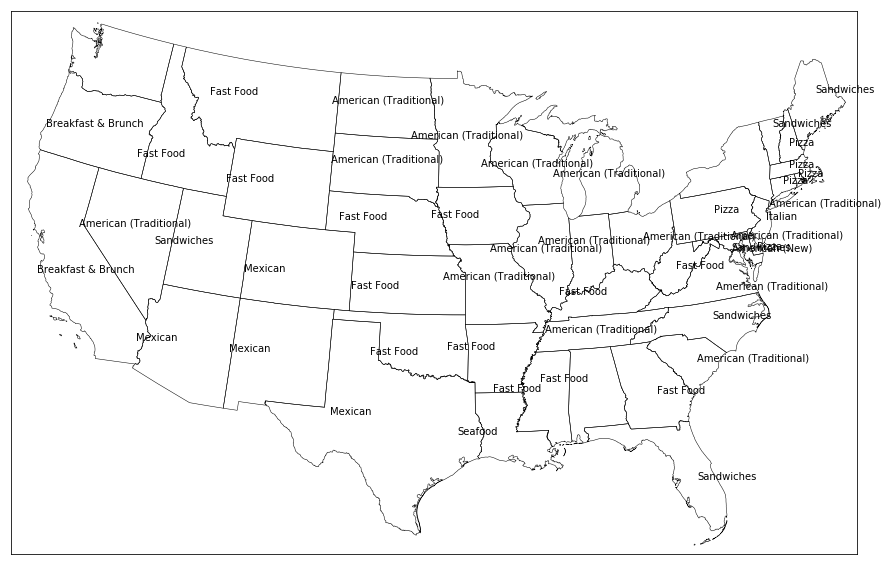

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math

cities = top_per_city
scale = 5
plt.figure(figsize=(20,10))
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

# Get the location of each city and plot it
geolocator = Nominatim()
for (city,count) in cities:
    if city in ["Alaska", "Hawaii"]: continue
    loc = geolocator.geocode(city)
    x, y = map(loc.longitude, loc.latitude)
    if x < 3500000: x = x-300000
    plt.text(x, y, count)
plt.show()

Next, we decided to look at something a bit more telling.

For each category of food, we wanted to know which states preferred it the most. So we created a heatmap for each of the top categories within the aggregated list.

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from geopy.geocoders import Nominatim


def create_heatmap(top, high, medium, low, x, y, genre):
    """ create the actual heatmat image over the united states
    Inputs
        top, high, medium, low (list): lists containing states in each of the heat categories
        x, y (int): represents size of the resulting map
        genre: the food category being mapped by the function
    Outputs
        None
    """
    plt.figure(figsize=(x-5,y))
    # create the map
    map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # load the shapefile, use the name 'states'
    map.readshapefile('st99_d00', name='states', drawbounds=True)

    # collect the state names from the shapefile attributes so we can
    # look up the shape obect for a state by it's name
    state_names = []
    for shape_dict in map.states_info:
        state_names.append(shape_dict['NAME'])
    ax = plt.gca() # get current axes instance
    # get states and draw the filled polygon
    for level in [top, high, medium, low]:
        if level == top: color = 'darkred'
        elif level == high: color = 'red'
        elif level == medium: color = 'darkorange'
        elif level == low: color = 'orange'
        for state in level:
            if state == "Wisconsin":
                seg = map.states[101]
            elif state == "Michigan":
                seg = map.states[106]
                poly = Polygon(seg, facecolor=color,edgecolor=color)
                ax.add_patch(poly)
                seg = map.states[97]
            else:
                seg = map.states[state_names.index(state)]
            poly = Polygon(seg, facecolor=color,edgecolor=color)
            ax.add_patch(poly)
    plt.title(genre)
    plt.show()


def plot_heatmap(state_rankings, food_genre, x=20, y=10):
    """ initializes the heat rank for each states and calls function to map
    Inputs
        state_rankings (dict): each key is state corresponding to a list of top rankings by category
        food_genre: the food category being analyzed
        x, y (int): represents size of the resulting map
    Outputs
        None
    """
    top_3 = []
    top_4_to_5 = []
    top_6_to_8 = []
    top_9_to_11 = []
    for state in state_rankings:
        ranking = state_rankings[state]
        if food_genre in ranking[:3]: top_3.append(state)
        elif food_genre in ranking[3:5]: top_4_to_5.append(state)
        elif food_genre in ranking[5:8]: top_6_to_8.append(state)
        elif food_genre in ranking[8:11]: top_9_to_11.append(state)
            
    create_heatmap(top_3, top_4_to_5, top_6_to_8, top_9_to_11, x, y, food_genre)

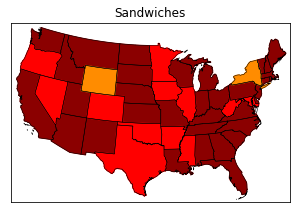

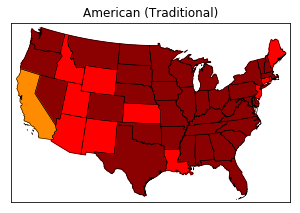

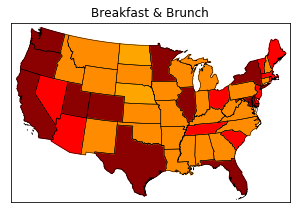

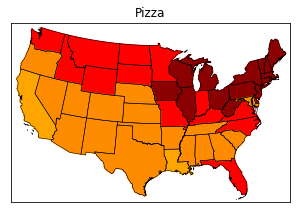

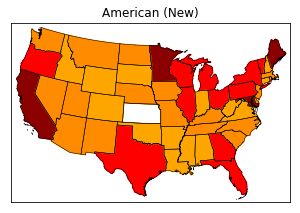

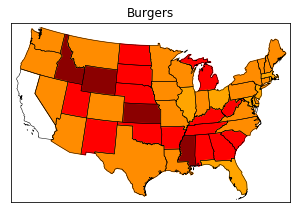

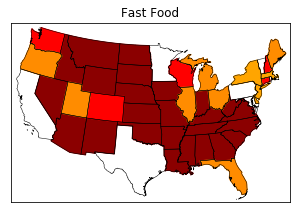

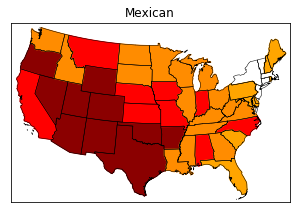

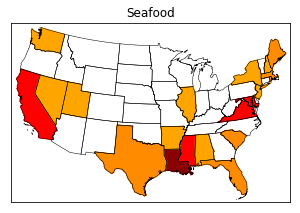

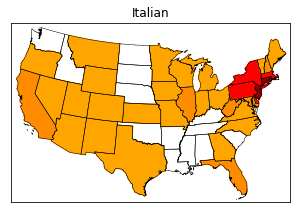

In [24]:
for category in country_favorites:
    plot_heatmap(top_choices, category, 10, 5)

The results of the visualization confirmed the predetermined notions that we had about certain foods. For example, the fact that seafood would be enjoyed more in the coastal regions of America, or that Mexican food would be more popular towards the Mexican border of the U.S.

# Review Parser

In this section, we will extract Yelp reviews for various restaurants in each state and analyze word frequencies for food words in these reviews to get an understanding of what foods people like to discuss. We use a word cloud to visualize our word frequencies for each state because it's the clearest way of displaying which foods occurred the most frequently by their size in the word cloud. The last thing we do with the reviews is to predict whether or not a given review is from a coastal or non-coastal state using an SVM classifier.

## Setting Up

We use our previously created dictionary of states with the most populated cities to make the dataframe from the data that we extracted using the Yelp API in the Map_Visualization section and store it in the variable states.

In [27]:
price_converter = {
        "$"   : 1,
        "$$"  : 2,
        "$$$" : 3,
        "$$$$": 4,
        "€"   : 1,
        "€€"  : 2,
        "€€€" : 3,
        "€€€€": 4
}

def state_to_frame(state_path): 
    """ reads state data into dataframe, cleans, and concatenates them together for all cities
    Inputs
        state_path(str): path to the datafile for a given state
    Outputs
        state_frame(pd.DataFrame): cleaned dataframe of data from given file
    """
    state = pd.read_json(state_path)
    business_list = [pd.DataFrame(state["businesses"][i]) for i in range(len(state["businesses"]))]
    state_frame = pd.concat(business_list, ignore_index=True)
    state_frame.drop(['alias', 'display_phone', 'id',
       'image_url', 'is_closed', 'transactions'], axis=1, inplace=True)
    state_frame.dropna(inplace=True)
    state_frame.reset_index(drop=True, inplace=True)
    state_frame["categories"] = state_frame["categories"].apply(lambda x : [x[i]["title"] for i in range(len(x))])
    state_frame["price"] = state_frame["price"].apply(lambda x: price_converter[x])
    return state_frame

def read_statefiles(pathname="./reviewdata/"):
    """ converts all state data files into a dataframe
    Inputs
        pathname(str): path of folder where state files are loacted
    Outputs
        state_dict(dict): dict with each input corresponding to dataframe for that state
    """
    state_dict = {}
    for filename in os.listdir(pathname):
        state_dict[filename[:-4]] = state_to_frame("./reviewdata/" + filename)
    return state_dict

states = read_statefiles()

## Extracting Reviews

Now that we have the urls for all of the restaurants we are analyzing, we can use BeautifulSoup to extract the reviews from the urls. We decided to store the reviews in a folder '/reviews' so we would only have to collect the reviews once since this extraction for hundreds of restaurants was a lengthy process.

First, we define parse_page which takes in the HTML string for a Yelp restaurant and uses BeautifulSoup to find the review data in the HTML code. It specifically extracts the review's id, the user's id who reviewed the restaurant, the rating given, the date the review was given, and finally the actual text of the review.

In [28]:
import io, time, json, os
import requests
from bs4 import BeautifulSoup
import pandas as pd

def parse_page(html):
    """
    Parse the reviews on a single page of a restaurant.
    
    Args:
        html (string): String of HTML corresponding to a Yelp restaurant

    Returns:
        tuple(list, string): a tuple of two elements
            first element: list of dictionaries corresponding to the extracted review information
            second element: URL for the next page of reviews (or None if it is the last page)
    """
    res = []
    soup = BeautifulSoup(html, 'html.parser')
    for head in soup.find_all("div", class_="review review--with-sidebar"):
        reviewid = head.get("data-review-id")
        userid = head.get("data-signup-object")
        userid = userid[8:]
        rating = head.find("div", class_="i-stars")
        rating = rating.get("title")
        rating = float(rating[0:3])
        date = head.find("span", class_="rating-qualifier").get_text().strip()
        text = head.find("p").get_text()
        temp = dict()
        temp["review_id"] = reviewid
        temp["user_id"] = userid
        temp["rating"] = rating
        temp["date"] = date
        temp["text"] = text
        res += [temp]
    url = soup.find("a", class_="u-decoration-none next pagination-links_anchor")
    if (url == None): return (res, None)
    return (res, url["href"])

Now that we have the capabilities to parse reviews for a single restuarant, we want to dump the reviews into a txt file so we do not have to extract them again in the future. So get_reviews takes in the state, the url, and the name of the restaurant and puts the results from the parse_page function into a file with the name of the state and the name of the restaurant.

We want to extract this data for all of the restaurants we analyzed in a given state, so we call this get_reviews for each restaurant in a state in the get_reviews_for_state function. All of our extracted data is in the 'states' variable, so we iterate through each state in 'states' and call get_reviews_for_state for each of these states.

In [29]:
def get_reviews(state, url, name):
    """
    Get the yelp data for a restaurant, and write it to a file

    Args:
        state (string): Name of the state
        url (string): url of the restaurant
        name (string): name of the restaurant

    """
    with open('reviews/'+state+name+'.txt', 'w') as f:
        response = requests.get(url)
        soup = parse_page(response.content)
        json.dump(soup, f, ensure_ascii=False)
        
def get_reviews_for_state(state, states):
    """
    Get the yelp data for all the restaurants in a state

    Args:
        state (string): Name of the state
        url (string): url of the restaurant
        name (string): name of the restaurant

    """
    states[state] = states[state].reset_index(drop = True)
    states[state]['name'] = states[state]['name'].str.replace("/", "")
    for i in range(len(states[state]['url'])):
        get_reviews(api_key, state, states[state]['url'][i], states[state]['name'][i])

for state in states:
    get_reviews_for_state(state, states);

## Word Frequency Analyzing

We have now extracted the reviews for each of the restaurants for every state in their respective txt files, so now we actually have to parse them to find word frequencies of foods in those reviews. The 'nltk' library contains a list of 3785 common food words in its wordnet interface so we use that as a dictionary for the words we will be extracting frequencies of. It contains foods ranging from 'corn' to 'falafel' to 'pasta sauce', so this dictionary is pretty comprehensive and contains most words people would be using when talking about foods. The wordnet list also contained words like 'breakfast', 'plate', 'a' for Vitamin A, which we do not need to be counting so we remove these words from the list. A list of all the foods can be seen from the output of printing the variable 'foods'.

In [30]:
import nltk
from nltk.corpus import wordnet as wn

def get_food_list():
    """
    Makes a list of common food words from the Wordnet interface

    Returns:
        foods (list): a list of common food words that are lowercase and foods with more than one word are separated by a space

    """
    #the two food lists are 'food.n.01' and 'food.n.02' from wordnet
    food = wn.synset('food.n.01')
    foods = list(set([w for s in food.closure(lambda s:s.hyponyms()) for w in s.lemma_names()]))
    food = wn.synset('food.n.02')
    foods.extend(list(set([w for s in food.closure(lambda s:s.hyponyms()) for w in s.lemma_names()])))
    
    #replace the _ and - between words with a space
    for i in range(len(foods)):
        foods[i] = foods[i].replace('_', ' ')
        foods[i] = foods[i].replace('-', ' ')
        foods[i] = foods[i].lower()
        
    #Remove the words in foods that are not needed
    foods.remove('a')
    foods.remove('b')
    foods.remove('c')
    foods.remove('d')
    foods.remove('e')
    foods.remove('breakfast')
    foods.remove('lunch')
    foods.remove('dinner')
    foods.remove('brunch')
    foods.remove('menu')
    foods.remove('meal')
    foods.remove('plate')
    foods.remove('table')
    foods = [' ' + food + ' ' for food in foods]
    return foods

foods = get_food_list()
print(foods)

[' diet ', ' single cream ', ' simnel ', ' candied fruit ', ' picnic ', ' goat cheese ', ' caramel bun ', ' panocha ', ' praline ', ' bordeaux wine ', ' corn gluten feed ', ' coquille ', ' pet food ', ' carrot stick ', ' kaiser roll ', ' sauce ', ' grain ', ' sun tea ', ' piece de resistance ', ' hungarian goulash ', ' cognac ', ' open face sandwich ', ' congo ', ' board ', ' pepsi cola ', ' new england clam chowder ', ' orange liqueur ', ' challah ', ' swedish meatball ', ' indian relish ', ' ice lolly ', ' drinkable ', ' port ', ' hand cheese ', ' rye bread ', ' beef stew ', ' potato skin ', ' johnnycake ', ' irish ', ' retsina ', ' eats ', ' tomato paste ', ' armerican cheddar ', ' scouse ', ' bread ', ' grappa ', ' french loaf ', ' cinnamon ', ' dehydrated food ', ' rioja ', ' chocolate mousse ', ' pruno ', ' fizz ', ' ginger pop ', ' farina ', ' chocolate ice cream ', ' preserves ', ' low sodium diet ', ' saute ', ' marsala ', ' three decker ', ' summer savoury ', ' cabernet ', ' 

We've just created the list of food words we will be getting frequencies of in the reviews, so now we need to go through each review and count the words we are looking for. The function get_word_counts returns a dictionary, where the each key is the food word that has been found in any of the reviews for a restaurant in the given state and the value is the number of times that word was found. I've given an example of the output from analyzing word frequencies for the state of Michigan. This example has also been carried forward to create the WordCloud for this state.

In [31]:
def get_word_counts(state, states=states):
    """
    Creates a dictionary of word frequencies from all the reviews for a given state
    
    Args:
        state (string): the state we are analyzing for its restaurants
        states (list): the list of pandas dataframes of all the extracted data from Yelp API
        
    Returns:
        foods: a list of common food words that are lowercase and foods with more than one word are separated by a space

    """
    res = {}
    #iterate through each resturant in a given state
    for i in range(len(states[state]['url'])):
        #find the file name
        with open('reviews/'+state+states[state]['name'][i]+'.txt', 'r') as f:
            data = json.load(f)
            #loop through each review in the file
            for j in range(len(data[0])):
                whole_review = data[0][j]
                review = whole_review['text']
                tokens = nltk.word_tokenize(review)
                review = review.lower()
                for food in foods:
                    if food in review:
                        food = food.replace(" ", "")
                        if food in res:
                            res[food] += 1
                        else:
                            res[food] = 1
    return res

word_frequencies = get_word_counts('michigan', states)
print(word_frequencies)

{'alcohol': 6, 'white': 27, 'green': 45, 'fries': 174, 'meat': 72, 'beer': 139, 'truffle': 22, 'pickle': 4, 'cheese': 304, 'chicken': 146, 'buffalo': 8, 'side': 96, 'picnic': 6, 'caramel': 9, 'julep': 1, 'marshmallow': 3, 'soup': 34, 'potato': 76, 'course': 37, 'chow': 3, 'cocktail': 39, 'mint': 4, 'cheddar': 26, 'caramelapple': 2, 'mintjulep': 1, 'drink': 79, 'chowmein': 1, 'dessert': 39, 'orange': 12, 'delicious': 119, 'apple': 22, 'duck': 29, 'gravy': 8, 'chili': 56, 'appetizer': 24, 'pork': 73, 'venison': 2, 'fryer': 4, 'split': 40, 'burger': 40, 'salad': 70, 'wedge': 1, 'bacon': 27, 'wine': 52, 'porkbelly': 20, 'mustard': 24, 'sauce': 111, 'peanutbutter': 5, 'butter': 56, 'bun': 18, 'herb': 5, 'fish': 36, 'cucumber': 2, 'mix': 21, 'egg': 26, 'nacho': 1, 'waffle': 9, 'snap': 2, 'brisket': 18, 'sweet': 84, 'cole': 1, 'bread': 180, 'must': 58, 'corn': 21, 'beef': 71, 'cut': 32, 'pudding': 12, 'cornbread': 6, 'coleslaw': 5, 'banana': 8, 'sweetpotato': 9, 'filling': 15, 'potatosalad': 

## Creating the WordCloud

The first step to create a WordCloud is to create a string using the dictionary we created above. The string is composed of as many copies of a word as it's frequency in the reviews.

In [32]:
def createString(resultDict):
    foodstr = ""
    for key in resultDict:
        for i in range(resultDict[key]):
            foodstr = foodstr+" "+key
    return foodstr

            
frequencyStr = createString(word_frequencies)
print(frequencyStr)

 alcohol alcohol alcohol alcohol alcohol alcohol white white white white white white white white white white white white white white white white white white white white white white white white white white white green green green green green green green green green green green green green green green green green green green green green green green green green green green green green green green green green green green green green green green green green green green green green fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fries fri

We now use pass this string into the WordCloud module to create the required WordCloud. To read more on how to create a word cloud, you can read this [blogpost](https://peekaboo-vision.blogspot.com/2012/11/a-wordcloud-in-python.html).

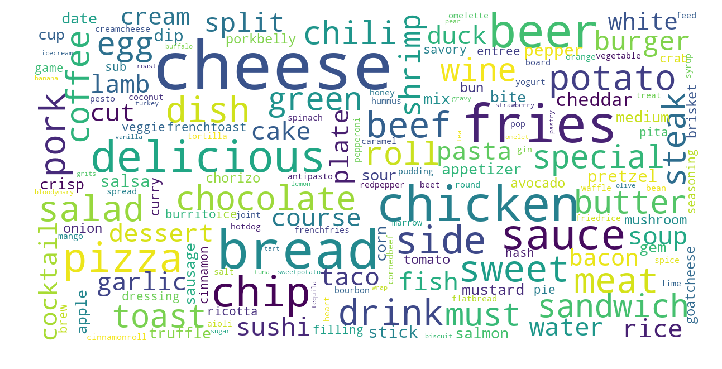

In [33]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        collocations= False,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(frequencyStr)

# Classification
We've calculated word frequencies from reviews from every state. But now we want to see if we can do something a little more interesting by classifying the reviews using SVM to see whether or not we can predict whether a review is from a coastal state. We've defined the coastal states as the states listed in the coastal variable.

In [34]:
lower_names = [ 'alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut', 'delaware', 'dc', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 'newHampshire', 'newJersey', 'newMexico', 'newYork', 'northCarolina', 'northDakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhodeIsland', 'southCarolina', 'southDakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington', 'westVirginia', 'wisconsin', 'wyoming']
upper_names = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
lower_to_upper = dict((lower_names[i], upper_names[i]) for i in range(len(lower_names))) 
upper_to_lower = dict((upper_names[i], lower_names[i]) for i in range(len(lower_names))) 

coastal = ["Maine", "New Hampshire", "Massachusetts", "Rhode Island", "Connecticut", "New York", "Delaware", "New Jersey", "Maryland", "Virginia", "District of Columbia", "North Carolina", "South Carolina", "Georgia", "Florida", "Oregon", "Washington", "Alaska", "Hawaii", "California", "Alabama", "Mississippi", "Louisiana", "Texas"]
non_coastal = sorted(list(set(upper_names).difference(set(coastal))))

lower_coastal = [upper_to_lower[state] for state in coastal]
lower_non_coastal = [upper_to_lower[state] for state in non_coastal]
regions = {
    ##0 is coastal and 1 is non_coastal
    0 : lower_coastal,
    1 : lower_non_coastal
}

state_to_region = dict( (v,k) for k in regions for v in regions[k])

In order to run the classifier, we first need to build our initial pandas dataframe from the extracted review data where one column is the review text and the second column is a binary encoding (0 or 1) on whether the review is from a coastal state or not. The value is 0 if the state is coastal, 1 if the state is not coastal. We extract all the reviews from all states into a single dataframe. The final dataframe is printed below.



In [35]:
def create_labels(state, states=states):
    """
    Extracts each individual review for the given state and assigns it to the label coastal in a pandas dataframe

    Args:
        state (string): the state we are analyzing for its restaurants
        states (list): the list of pandas dataframes of all the extracted data from Yelp API
        
    Returns:
        text_frame (pd.Dataframe) : dataframe with the text from a review assigned to coastal or non-coastal

    """
    res = []
    for i in range(len(states[state]['url'])):
        if states[state]['name'][i] == "Shango New Orleans Bistro / Wine Bar": continue
        with open('reviews/'+state+states[state]['name'][i]+'.txt', 'r') as f:
            data = json.load(f)
            frame = pd.DataFrame(data[0])
            if frame.empty: continue
            frame = frame.drop(["date", "rating", "review_id", "user_id"], axis=1)
            res.append(frame)
    text_frame = pd.concat(res, ignore_index=True)
    text_frame["region"] = state_to_region[state]
    return text_frame

def get_all_labels():
    """
    Combines all the pandas dataframes for each state into a single pandas dataframe, where each row is a review
    0: coastal
    1: non-coastal

    Returns:
        res (pd.Dataframe) : pandas Dataframe for reviews from all states and whether they are from coastal or not

    """
    res = []
    for state in state_cities:
        res.append(create_labels(state))
    return pd.concat(res, ignore_index=True)

all_labels = get_all_labels()
print(all_labels)

                                                    text  region
0      I rarely wait at all to be seated for dinner. ...       0
1      Had the fish special..,awesomely fresh and hea...       0
2      Usually a wait, especially on a weekend night ...       0
3      Incredible Mexican food!! We arrived around 7:...       0
4      El Barrio is the best. You won't find a better...       0
5      My parents came to town for a rare visit to Bi...       0
6      Food is delicious!! However, never go when you...       0
7      Was in town and thought may give this place a ...       0
8      Great vibe. Busy on a Tuesday evening. 20min w...       0
9      I'm very surprised this review hasn't been wri...       0
10     In my opinion this is the best brunch spot in ...       0
11     What a great place. I came here with family wh...       0
12     Came here for dinner last night with a friend....       0
13     First experience here was for an early Valenti...       0
14     This place was ama

In order to classify the reviews we need to normalize the text to be compared. We convert all of the text to lowercase while also replacing all punctuations with spaces. We also lemmatize it using the nltk module to get all words into the same form.

In [36]:
from collections import Counter
import string
import numpy as np
import sklearn
from sklearn.svm import SVC
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def process(text, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    """ Normalizes case and handles punctuation
    Inputs:
        text (str) : raw text
        lemmatizer: an instance of a class implementing the lemmatize() method
                    (the default argument is of type nltk.stem.wordnet.WordNetLemmatizer)
    Outputs:
        list(str): tokenized text
    """
    text = text.lower()
    s = text.replace("'s", "")
    s = s.replace("'", "")
    for letter in string.punctuation:
        s = s.replace(letter, " ")
    tokens = nltk.word_tokenize(s)
    final_list = []
    for word in tokens:
        try:
            final_list.append(lemmatizer.lemmatize(word))
        except:
            pass
    return final_list

def process_all(df, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    """ process all text in the dataframe using process() function.
    Inputs
        df (pd.DataFrame): dataframe containing a column 'text' loaded from the CSV file
        lemmatizer: an instance of a class implementing the lemmatize() method
                    (the default argument is of type nltk.stem.wordnet.WordNetLemmatizer)
    Outputs
        pd.DataFrame: dataframe in which the values of text column have been changed from str to list(str),
    """
    df["text"] = df["text"].apply(lambda x: process(x))
    return df

processed_labels = process_all(all_labels)

We next need to get a list of rare words, which we defined as words that only appeared once in total among all of the reviews. There were 21714 rare words in total.

In [37]:
def get_rare_words(processed_tweets):
    """ use the word count information across all tweets in training data to come up with a feature list
    Inputs:
        processed_tweets: pd.DataFrame: the output of process_all() function
    Outputs:
        list(str): list of rare words, sorted alphabetically.
    """
    rare_list = []
    word_dict = Counter([])
    for text in processed_tweets["text"]:
        word_dict.update(text)
        
    for word in word_dict:
        if word_dict[word] == 1:
            rare_list.append(word)
    
    return sorted(rare_list)

rare_words = get_rare_words(processed_labels)
print(len(rare_words))

21714


We then have to create a sparse matrix of vectors using the TfidfVectorizer function from sklearn. We also ignored the rare words that we obtained in the previous section. We've also created our labels earlier on whether or not it was from a coastal state or not, so we set y to be those labels.

In [38]:
def create_features(processed_tweets, rare_words):
    """ creates the feature matrix using the processed tweet text
    Inputs:
        tweets: pd.DataFrame: tweets read from train/test csv file, containing the column 'text'
        rare_words: list(str): one of the outputs of get_feature_and_rare_words() function
    Outputs:
        sklearn.feature_extraction.text.TfidfVectorizer: the TfidfVectorizer object used
                                                we need this to tranform test tweets in the same way as train tweets
        scipy.sparse.csr.csr_matrix: sparse bag-of-words TF-IDF feature matrix
    """
    nltk_stop_words = nltk.corpus.stopwords.words('english')
    stop_words = rare_words + nltk_stop_words
    vectorizer = TfidfVectorizer(stop_words=stop_words)
    
    corpus = []
    for text in processed_tweets["text"]:
        corpus.append(" ".join(text))
    X = vectorizer.fit_transform(corpus)
    return vectorizer, X

(tfidf, X) = create_features(processed_labels, rare_words)
y = processed_labels["region"]

We now have to perform that actual classification with SVM. We first begin by learning a model for the classification fo reviews.

In [39]:
def learn_classifier(X_train, y_train, kernel='linear'):
    """ learns a classifier from the input features and labels using the kernel function supplied
    Inputs:
        X_train: scipy.sparse.csr.csr_matrix: sparse matrix of features, output of create_features_and_labels()
        y_train: numpy.ndarray(int): dense binary vector of class labels, output of create_features_and_labels()
        kernel: str: kernel function to be used with classifier. [best|linear|poly|rbf|sigmoid]
                    if 'best' is supplied, reset the kernel parameter to the value you have determined to be the best
    Outputs:
        sklearn.svm.classes.SVC: classifier learnt from data
    """
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    return clf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
classifier = learn_classifier(X_train, y_train, 'linear')

We now have to evaluate the mode we learned in the previous section. We use the training data as our validation data because we do not have other data to use for the validation. We also found that the linear classifer was the most accurate, so we decided to use that.

In [40]:
def evaluate_classifier(classifier, X_validation, y_validation):
    """ evaluates a classifier based on a supplied validation data
    Inputs:
        classifier: sklearn.svm.classes.SVC: classifer to evaluate
        X_train: scipy.sparse.csr.csr_matrix: sparse matrix of features
        y_train: numpy.ndarray(int): dense binary vector of class labels
    Outputs:
        double: accuracy of classifier on the validation data
    """
    right = 0
    total = len(y_validation)
    predictions = classifier.predict(X_validation)
    for prediction, val in zip(predictions, y_validation):
        if prediction == val:
            right += 1
    return right/total

accuracy = evaluate_classifier(classifier, X_test, y_test)
print(accuracy)

0.7196593328601846


We found our final accuracy to be 0.719.